# House price
### For this project, we have collected data on approximately 4,000 apartments. Our task is to estimate the price of the apartment using the features of the dataset, which we will describe below. The data is stored in the file 15.csv.
- Area of the house in meters (Area)
- Number of bedrooms (Room)
- Parking or not (Parking)
- Warehouse or not (Warehouse)
- Elevator or not (Elevator)
- Approximate address (Address)
- Price in dollars (Price)

### In this dataset, some houses do not have addresses, and the area of some houses is entered incorrectly (they have very large values). For this purpose, you should also manage these items and remove them from your dataset.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load the dataset
df = pd.read_csv('15.csv')

In [2]:
# Data Cleaning

# 1. Handle Missing Addresses
df = df.dropna(subset=['Address'])

# 2. Handle Incorrect Area Values
# Define a threshold for reasonable area values (adjust as needed)
max_area_threshold = 500  # Example threshold, adjust based on your data analysis



# Filter out rows with excessively large areas
# 1. Handle empty cells and non-numeric values
df['Area'] = pd.to_numeric(df['Area'], errors='coerce')

# 2. Filter out rows with excessively large areas and invalid values
df = df[(df['Area'].notna()) & (df['Area'] <= max_area_threshold)]

# Save the cleaned data to a new CSV file
# df.to_csv('16.csv', index=False)

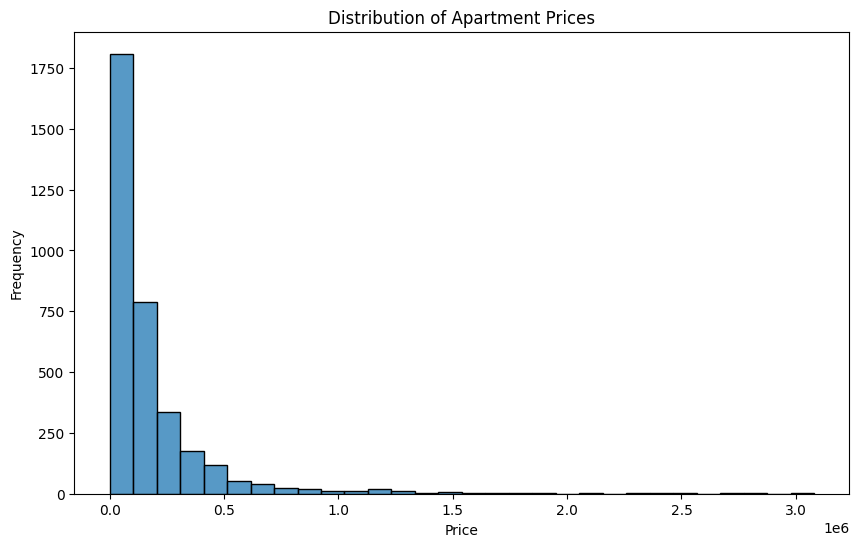

In [6]:
# Exploratory Data Analysis (EDA)

# 1. Visualize the distribution of prices
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], bins=30)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Apartment Prices')
plt.show()

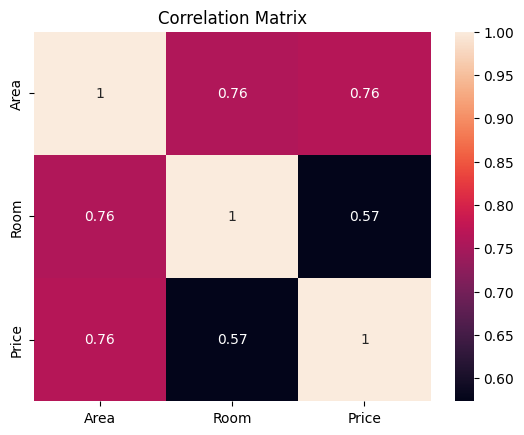

In [7]:
# 2. Check for correlations between features and price
correlation_matrix = df[['Area', 'Room', 'Price']].corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

In [5]:
# Feature Engineering

# 1. Convert categorical variables to numerical using one-hot encoding
df = pd.get_dummies(df, columns=['Parking', 'Warehouse', 'Elevator'])

# 2. Split data into features (X) and target variable (y)
X = df[['Area', 'Room', 'Parking_Yes', 'Warehouse_Yes', 'Elevator_Yes']]
y = df['Price']

KeyError: "['Parking_Yes', 'Warehouse_Yes', 'Elevator_Yes'] not in index"